In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,log_loss,accuracy_score
import copy

In [27]:
data = pd.read_csv(r"C:\Users\JAYANKONDAN\Downloads\archive (3)\Bank_Personal_Loan_Modelling.csv")

In [28]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [29]:
data.info()
data.drop(['ID','ZIP Code'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x16c3321c490>,
 'caps': [<matplotlib.lines.Line2D at 0x16c3321cbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c3321c100>],
 'medians': [<matplotlib.lines.Line2D at 0x16c33225310>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c332256a0>],
 'means': []}

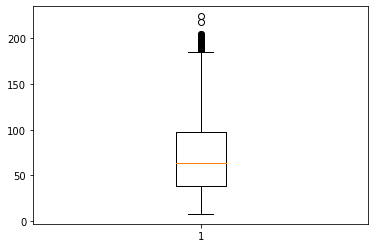

In [30]:
plt.boxplot(data['Income'])

In [31]:
data = data[data['Income']<=160]

class0:  93.48338692390139 %


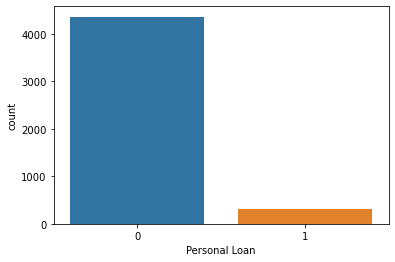

In [32]:
sns.countplot(x = 'Personal Loan',data = data)
print("class0: ",sum(data['Personal Loan']==0)/len(data)*100,"%")

In [33]:
X = data.drop('Personal Loan',axis=1).values
Y = data['Personal Loan'].values

In [34]:
xtr,xtst,ytr,ytst = tts(X,Y,test_size=0.25,stratify=Y,random_state=42)
xtr.shape,xtst.shape,ytr.shape,ytst.shape

((3498, 11), (1167, 11), (3498,), (1167,))

In [35]:
sc = StandardScaler()
xtr = sc.fit_transform(xtr)
xtst = sc.transform(xtst)

# NN-from scratch

In [36]:
class nn:
    def __init__(self,ip,op):
        self.ip=ip
        self.op=op
        print(ip.shape,op.shape)
        self.l1_size=100
        self.w1=np.random.rand(self.l1_size,self.ip.shape[1]+1).T*0.3-0.15
        self.w2=np.random.rand(self.op.shape[1],self.l1_size+1).T*0.3-0.15
        print(self.w1.shape,self.w2.shape)
        for i in range(1000):
            if i%10 == 0:print(i)
            self.train()
    
    def sig(self,x):
        return 1/(1+np.exp(-x))
    
    def train(self):
        #===front propogation===#
        ip=np.append(np.ones((len(self.ip),1)),self.ip,axis=1)
        l1=self.sig(ip@self.w1)
        l1=np.append(np.ones((len(l1),1)),l1,axis=1)
        pred=self.sig(l1@self.w2)
        #===back propogation===#
        #error at each layer
        d3 = (pred - self.op)
        d2 = (d3 @ self.w2.T * l1 * (1-l1))
        d2 = d2[:,1:]
        #altering weights
        self.w2-= (l1.T @ d3)/len(ip)
        self.w1-= (ip.T @ d2)/len(ip)
        
    def predict(self,ip):
        ip=np.append(np.ones((len(ip),1)),ip,axis=1)
        l1=self.sig(ip@self.w1)
        l1=np.append(np.ones((len(l1),1)),l1,axis=1)
        pred=self.sig(l1@self.w2)
        return pred

In [37]:
net = nn(xtr,ytr.reshape(-1,1))

(3498, 11) (3498, 1)
(12, 100) (101, 1)
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [38]:
ans = (net.predict(xtst)>0.5).astype(int)

In [39]:
confusion_matrix(ans,ytst)

array([[1076,   25],
       [  15,   51]], dtype=int64)

In [40]:
print(classification_report(ans,ytst))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1101
           1       0.67      0.77      0.72        66

    accuracy                           0.97      1167
   macro avg       0.83      0.88      0.85      1167
weighted avg       0.97      0.97      0.97      1167



# NN - Base for all models

In [193]:
class nn_base:
    def __init__(self,ip_size):
        print('creating NN BASE...')
        self.weightstruct = []
        self.ip_size = ip_size #number of features in input
        self.act = []
        
    def addlayer(self,layer_size,activation):
        self.act.append(activation)
        if self.weightstruct == []:
            self.weightstruct.append((self.ip_size+1,layer_size))
        else:
            prev = self.weightstruct[-1][-1]
            self.weightstruct.append((prev+1,layer_size))
            
    def sig(x):
        return 1/(1+np.exp(-x))
    
    def ReLU(x):
        return (x>0)*x
    
    def forward(self,ip,weights):
        layer = ip
        for i,j in zip(weights,self.act):
            layer = np.append(np.ones((len(layer),1)),layer,axis=1) #bias layer
            if j=='sigmoid':
                layer = nn_base.sig(layer @ i) #linear combination and activation
            else:
                layer = nn_base.ReLU(layer @ i)
        return layer
    
    def loss(pred,op):
        #Absolute Error
        return np.mean(abs(pred.flatten()-op.flatten()))
    
    def random_weights(self):
        new = []
        for i in self.weightstruct:
            new.append(np.random.random(i)*3-0.15)
        return new

This is a customised nn from scratch where the user can add as many layers as they want. The back tracking is not done by gradient descent ,so the front propogation function is alone enough. ReLU and sigmoid are the only activation functions for now.
This nn-base can be combined with any optimization function for backtracking.

In [255]:
base = nn_base(11) #input feature size 11

creating NN BASE...


In [256]:
base.addlayer(16,'ReLU') #creating nn-structure
base.addlayer(8,'sigmoid')
base.addlayer(1,'sigmoid')
base.weightstruct

[(12, 16), (17, 8), (9, 1)]

Total number of trainable parameters: (12 * 16) + (17 * 8) + (9 * 1) = 337

In [257]:
base.forward(xtr,base.random_weights())

array([[0.99995146],
       [0.99995146],
       [0.99995146],
       ...,
       [0.99995146],
       [0.99942034],
       [0.99995146]])

# NN - Genetic

In [210]:
class genetic:
    def __init__(self,base,pop_size):
        print("GENETIC")
        self.base = base
        self.pop_size = pop_size
        self.population = [base.random_weights() for i in range(pop_size)]
        self.gen = 0
        
    def move(self,xtr,ytr):
        nextgen = self.population.copy()
        for i in range(self.pop_size-1):
            for j in range(i,self.pop_size):
                p1 = self.population[i]
                p2 = self.population[j]
                c1,c2 = genetic.offspring(p1,p2)
                nextgen.append(c1)
                nextgen.append(c2)
                
        sortedgen = sorted(nextgen,key = lambda w : nn_base.loss(base.forward(xtr,w),ytr))
        self.population = sortedgen[:self.pop_size]
        
        self.gen += 1
        print("generation: %d | loss: %f"%(self.gen,nn_base.loss(base.forward(xtr,self.population[0]),ytr)))
                
    def offspring(p1,p2):
        c1 = []
        c2 = []
        for i in range(len(p1)):
            a = p1[i]
            b = p2[i]
            
            ind = np.random.randint(0,2,a.shape) #crossover
            child1 = a*ind + b*(1^ind)
            child2 = a*(1^ind) + b*ind
            
            child1 += (np.random.choice([0,1],child1.shape,p=[0.7,0.3]) * np.random.random(child1.shape)*2-0.5) #mutation
            child1 += (np.random.choice([0,1],child1.shape,p=[0.7,0.3]) * np.random.random(child2.shape)*2-0.5)
            
            c1.append(child1)
            c2.append(child2)
        return c1,c2

In [211]:
gen = genetic(base,10)

GENETIC


In [212]:
for i in range(100):
    gen.move(xtr,ytr)

generation: 1 | loss: 0.764938
generation: 2 | loss: 0.072761
generation: 3 | loss: 0.065607
generation: 4 | loss: 0.065320
generation: 5 | loss: 0.065196
generation: 6 | loss: 0.065181
generation: 7 | loss: 0.065181
generation: 8 | loss: 0.065127
generation: 9 | loss: 0.065127
generation: 10 | loss: 0.064975
generation: 11 | loss: 0.064914
generation: 12 | loss: 0.063479
generation: 13 | loss: 0.062598
generation: 14 | loss: 0.061296
generation: 15 | loss: 0.059608
generation: 16 | loss: 0.056453
generation: 17 | loss: 0.055030
generation: 18 | loss: 0.054132
generation: 19 | loss: 0.052493
generation: 20 | loss: 0.051522
generation: 21 | loss: 0.050060
generation: 22 | loss: 0.048145
generation: 23 | loss: 0.046648
generation: 24 | loss: 0.046619
generation: 25 | loss: 0.045976
generation: 26 | loss: 0.045596
generation: 27 | loss: 0.044294
generation: 28 | loss: 0.044280
generation: 29 | loss: 0.043793
generation: 30 | loss: 0.043793
generation: 31 | loss: 0.043447
generation: 32 | 

In [213]:
ans = (base.forward(xtst,gen.population[0])>0.5).astype(int)
confusion_matrix(ans,ytst)

array([[1074,   39],
       [  17,   37]], dtype=int64)

In [214]:
print(classification_report(ans,ytst))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1113
           1       0.49      0.69      0.57        54

    accuracy                           0.95      1167
   macro avg       0.74      0.83      0.77      1167
weighted avg       0.96      0.95      0.96      1167



In [215]:
from sklearn.metrics import f1_score

In [216]:
f1_score(ytst,ans)

0.5692307692307693

# NN - Particle swarm optimiztaion

In [274]:
class PSO:
    def __init__(self,base,pop_size):
        print("PARTICLE SWARM")
        self.base = base
        self.pop_size = pop_size
        self.population = [base.random_weights() for i in range(pop_size)]
        self.gen = 0
        self.personalbest = copy.deepcopy(self.population)
        self.globalbest = self.population[0]
        #self.velocity = [[np.zeros(j.shape) for j in self.globalbest] for i in range(pop_size)]
        self.velocity = copy.deepcopy(self.population)
        
        self.w = 0.7
        self.c1 = 1.4
        self.c2 = 1.4
        
    def move(self,xtr,ytr):
        self.update_values()
        self.update_best(xtr,ytr)
        self.gen += 1
        
    def update_values(self):
        for ind in range(self.pop_size):
            w = self.population[ind]
            personalbest = self.personalbest[ind]
            vel = self.velocity[ind]
            for i in range(len(w)):
                r1, r2 = np.random.rand(2)
                vel[i] = self.w*vel[i] + self.c1*r1*(personalbest[i]-w[i]) + self.c2*r2*(self.globalbest[i]-w[i])
                w[i] += vel[i]
        
    def update_best(self,xtr,ytr):
        loss = lambda w : nn_base.loss(base.forward(xtr,w),ytr)
        for ind in range(self.pop_size):
            w = self.population[ind]
            
            if loss(w) < loss(self.personalbest[ind]): #updating personal best
                self.personalbest[ind] = copy.deepcopy(w)
                
            if loss(self.personalbest[ind]) < loss(self.globalbest): #updating global best
                self.globalbest = copy.deepcopy(self.personalbest[ind])
                
        print("generation: %d | loss: %f"%(self.gen,loss(self.globalbest)))

In [275]:
pso = PSO(base,1000)

PARTICLE SWARM


In [276]:
for i in range(25):
    pso.move(xtr,ytr)

generation: 0 | loss: 0.906205


C:\Users\JAYANK~1\AppData\Local\Temp/ipykernel_11880/1634064413.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


generation: 1 | loss: 0.065180
generation: 2 | loss: 0.065180
generation: 3 | loss: 0.065176
generation: 4 | loss: 0.065167
generation: 5 | loss: 0.065022
generation: 6 | loss: 0.064044
generation: 7 | loss: 0.060001
generation: 8 | loss: 0.060001
generation: 9 | loss: 0.060001
generation: 10 | loss: 0.059962
generation: 11 | loss: 0.059962
generation: 12 | loss: 0.059937
generation: 13 | loss: 0.059290
generation: 14 | loss: 0.058052
generation: 15 | loss: 0.057352
generation: 16 | loss: 0.055761
generation: 17 | loss: 0.055648
generation: 18 | loss: 0.053864
generation: 19 | loss: 0.052727
generation: 20 | loss: 0.051950
generation: 21 | loss: 0.051508
generation: 22 | loss: 0.049707
generation: 23 | loss: 0.048645
generation: 24 | loss: 0.046146


In [279]:
ans = (base.forward(xtst,pso.globalbest)>0.5).astype(int)
confusion_matrix(ans,ytst)

array([[1083,   58],
       [   8,   18]], dtype=int64)

In [280]:
print(classification_report(ans,ytst))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1141
           1       0.24      0.69      0.35        26

    accuracy                           0.94      1167
   macro avg       0.61      0.82      0.66      1167
weighted avg       0.98      0.94      0.96      1167



# NN - Cultural

In [287]:
class cultural(genetic):
    def __init__(self,base,pop_size):
        super().__init__(base,pop_size)
        print('CULTURAL')
        
    def move(self,xtr,ytr):
        nextgen = self.population.copy()
        for i in range(self.pop_size-1):
            for j in range(i,self.pop_size):
                p1 = self.population[i]
                p2 = self.population[j]
                c1,c2 = genetic.offspring(p1,p2)
                nextgen.append(c1)
                nextgen.append(c2)
                
        sortedgen = sorted(nextgen,key = lambda w : nn_base.loss(base.forward(xtr,w),ytr))
        self.population = sortedgen[:self.pop_size//2]
        
        cultfit = max(self.population,key = lambda w : self.culture_score(w,xtr,ytr))
        self.population += self.culture_influence(self.population,cultfit)
        
        self.gen += 1
        print("generation: %d | loss: %f"%(self.gen,nn_base.loss(base.forward(xtr,self.population[0]),ytr)))
        
    def culture_score(self,w,xtr,ytr):
        pred = base.forward(xtr,w)
        a = sum(ytr==1) #True count
        b = sum(pred[np.where(ytr==1)]>0.5) #True positive count
        return b/a
    
    def culture_influence(self,pop,best):
        pop1 = copy.deepcopy(pop)
        for w in pop1:
            for j in range(len(w)):
                w[j] += np.random.choice([0,1],w[j].shape,p=[0.8,0.2]) * best[j]
        return pop1

In [288]:
cult = cultural(base,10)

GENETIC
CULTURAL


In [289]:
for i in range(100):
    cult.move(xtr,ytr)

generation: 1 | loss: 0.707446
generation: 2 | loss: 0.066374
generation: 3 | loss: 0.065195
generation: 4 | loss: 0.065180
generation: 5 | loss: 0.065178


C:\Users\JAYANK~1\AppData\Local\Temp/ipykernel_11880/1634064413.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


generation: 6 | loss: 0.065177
generation: 7 | loss: 0.065174
generation: 8 | loss: 0.065169
generation: 9 | loss: 0.065165
generation: 10 | loss: 0.065126
generation: 11 | loss: 0.064886
generation: 12 | loss: 0.064816
generation: 13 | loss: 0.064293
generation: 14 | loss: 0.063703
generation: 15 | loss: 0.062618
generation: 16 | loss: 0.060902
generation: 17 | loss: 0.059159
generation: 18 | loss: 0.054297
generation: 19 | loss: 0.053253
generation: 20 | loss: 0.048763
generation: 21 | loss: 0.043985
generation: 22 | loss: 0.043985
generation: 23 | loss: 0.043796
generation: 24 | loss: 0.043796
generation: 25 | loss: 0.041245
generation: 26 | loss: 0.041245
generation: 27 | loss: 0.041245
generation: 28 | loss: 0.041245
generation: 29 | loss: 0.041245
generation: 30 | loss: 0.041245
generation: 31 | loss: 0.041245
generation: 32 | loss: 0.041245
generation: 33 | loss: 0.040196
generation: 34 | loss: 0.040143
generation: 35 | loss: 0.037670
generation: 36 | loss: 0.037670
generation: 

In [285]:
ans = (base.forward(xtst,cult.population[0])>0.5).astype(int)
confusion_matrix(ans,ytst)

C:\Users\JAYANK~1\AppData\Local\Temp/ipykernel_11880/1634064413.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


array([[1073,   50],
       [  18,   26]], dtype=int64)

In [286]:
print(classification_report(ans,ytst))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1123
           1       0.34      0.59      0.43        44

    accuracy                           0.94      1167
   macro avg       0.66      0.77      0.70      1167
weighted avg       0.96      0.94      0.95      1167



# NN - Ant Colony

In [346]:
class antcolony:
    def __init__(self,base,n_ants):
        print("ACO")
        self.base = base
        self.n_ants = n_ants
        self.population = [base.random_weights() for i in range(n_ants)]
        self.pheromone = [[np.ones(i.shape) for i in self.population[0]] for j in range(n_ants)]
        self.gen = 0
        self.loss = lambda w,xtr,ytr : nn_base.loss(base.forward(xtr,w),ytr)
        
    def move(self,xtr,ytr):

        for i in self.population:
            ind = np.arange(self.n_ants)
            bestind = np.random.choice(ind,p = self.popacc)
            self.updateant(i,bestind)
            
        self.gen += 1
        print("generation: %d | acc: %f"%(self.gen,max(self.popacc)))
            
    def updateant(self,ant,bestind):
        best = self.population[bestind]
        val = 1/self.popacc[bestind]
        for i in range(len(ant)):
            ant[i] += val*best[i]*0.01

In [347]:
aco = antcolony(base,50)

ACO


In [348]:
for i in range(50):
    aco.move(xtr,ytr)

generation: 1 | acc: 0.934815
generation: 2 | acc: 0.934820
generation: 3 | acc: 0.934820


C:\Users\JAYANK~1\AppData\Local\Temp/ipykernel_11880/1634064413.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


generation: 4 | acc: 0.934820
generation: 5 | acc: 0.934820
generation: 6 | acc: 0.934820
generation: 7 | acc: 0.934820
generation: 8 | acc: 0.934820
generation: 9 | acc: 0.934820
generation: 10 | acc: 0.934820
generation: 11 | acc: 0.934820


KeyboardInterrupt: 

In [349]:
ans = (base.forward(xtst,cult.population[0])>0.5).astype(int)
confusion_matrix(ans,ytst)

C:\Users\JAYANK~1\AppData\Local\Temp/ipykernel_11880/1634064413.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


array([[1080,   39],
       [  11,   37]], dtype=int64)

In [350]:
print(classification_report(ans,ytst))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1119
           1       0.49      0.77      0.60        48

    accuracy                           0.96      1167
   macro avg       0.74      0.87      0.79      1167
weighted avg       0.97      0.96      0.96      1167

